In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.3 MB/s eta 0:15:03tcmalloc: large alloc 1147494400 bytes == 0x5590fae76000 @  0x7f005421f615 0x5590c0d1e17c 0x5590c0dfe47a 0x5590c0d20f9d 0x5590c0e12d4d 0x5590c0d94ec8 0x5590c0d8fa2e 0x5590c0d2288a 0x5590c0d94d30 0x5590c0d8fa2e 0x5590c0d2288a 0x5590c0d91719 0x5590c0e13b76 0x5590c0d90d95 0x5590c0e13b76 0x5590c0d90d95 0x5590c0e13b76 0x5590c0d90d95 0x5590c0d22ce9 0x5590c0d66579 0x5590c0d21902 0x5590c0d94c4d 0x5590c0d8fa2e 0x5590c0d2288a 0x5590c0d91719 0x5590c0d8fa2e 0x5590c0d2288a 0x5590c0d908f6 0x5590c0d227aa 0x5590c0d90b4f 0x5590c0d8fa2e
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:13:41tcmalloc: large alloc 1434370048 bytes == 0x55913f4cc000 @  0x7f005421f615 0x5590c0d1e17c 0x5590c0dfe47a 0x5590c0d20f9d 0x5590c0e12d4d 0x5590c0d94ec8 0x5590c0d8fa2e 0x5590c0d2288a 0x5590c0d94d30 0x5590c0d8fa2e 0x5590c0d2288a 0x5590c0d91719 0x5590c0e13b76 0x5590c0d90d

In [ ]:
from mmcv import collect_env
collect_env()

{'CUDA available': True,
 'CUDA_HOME': '/usr/local/cuda',
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'GPU 0': 'Tesla T4',
 'MMCV': '1.5.0',
 'MMCV CUDA Compiler': '11.1',
 'MMCV Compiler': 'GCC 7.3',
 'NVCC': 'Cuda compilation tools, release 11.1, V11.1.105',
 'OpenCV': '4.1.2',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=comp

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.23.0
11.1
GCC 7.3


In [ ]:
%cd ..
%cd ..

/content
/


In [ ]:
!mkdir content/mmdetection/data

In [ ]:
!cp -a content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/* content/mmdetection/data
!cp content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/config/coco_detection_base.py content/mmdetection/configs/_base_/datasets
!cp content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/config/faster_rcnn_r50_fpn_1x_coco_base.py content/mmdetection/configs/faster_rcnn
!cp content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/config/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco_base.py content/mmdetection/configs/faster_rcnn

cp: cannot stat 'content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/*': No such file or directory
cp: cannot stat 'content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/config/coco_detection_base.py': No such file or directory
cp: cannot stat 'content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/config/faster_rcnn_r50_fpn_1x_coco_base.py': No such file or directory
cp: cannot stat 'content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/config/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco_base.py': No such file or directory


In [ ]:
%pwd

'/'

In [ ]:
%cd content/mmdetection/data/train

/content/mmdetection/data/train


In [ ]:
import os

# folder path
dir_path = r'.'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)


File count: 4000


In [ ]:
%cd train

/content/mmdetection/data/train


In [ ]:
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

arr = os.listdir('.')
arr = sort(arr)
print(sort(arr))

trainfilelist = []
valfilelist = []
testfilelist = []
removallist = []
for i in range(len(arr)):
  if i < 2000:
    trainfilelist.append(arr[i])
  elif i >= 2000 and i < 2500:
    valfilelist.append(arr[i])
  elif i >= 2500 and i < 3000:
    testfilelist.append(arr[i])
  else:
    removallist.append(arr[i])

print(len(trainfilelist))
print(len(valfilelist))
print(len(testfilelist))
print(len(removallist))
  # if i >= 3000:
  #   #os.remove(arr[i])
  #   removallist.append(arr[i])
  # else:
  #   trainfilelist.append(arr[i])


['000000000009.jpg', '000000000025.jpg', '000000000030.jpg', '000000000034.jpg', '000000000036.jpg', '000000000042.jpg', '000000000049.jpg', '000000000061.jpg', '000000000064.jpg', '000000000071.jpg', '000000000072.jpg', '000000000073.jpg', '000000000074.jpg', '000000000077.jpg', '000000000078.jpg', '000000000081.jpg', '000000000086.jpg', '000000000089.jpg', '000000000092.jpg', '000000000094.jpg', '000000000109.jpg', '000000000110.jpg', '000000000113.jpg', '000000000127.jpg', '000000000133.jpg', '000000000136.jpg', '000000000138.jpg', '000000000142.jpg', '000000000143.jpg', '000000000144.jpg', '000000000149.jpg', '000000000151.jpg', '000000000154.jpg', '000000000164.jpg', '000000000165.jpg', '000000000192.jpg', '000000000194.jpg', '000000000196.jpg', '000000000201.jpg', '000000000208.jpg', '000000000241.jpg', '000000000247.jpg', '000000000250.jpg', '000000000257.jpg', '000000000260.jpg', '000000000263.jpg', '000000000283.jpg', '000000000294.jpg', '000000000307.jpg', '000000000308.jpg',

In [ ]:
%cd ..

/content/mmdetection/data


In [ ]:
import json
from pprint import pprint

f = open('instances_train2017_trunc.json')
train_dict = {}
val_dict = {}
test_dict = {}
train_distinct_image = []
val_distinct_image = []
test_distinct_image = []

# returns JSON object as
# a dictionary
data = json.load(f)
# print(data.keys())
for i in range(len(data['annotations'])):
  imageid = str(data['annotations'][i]['image_id'])
  imageid = imageid.zfill(12) + '.jpg'

  if imageid in trainfilelist:
    cat_key = data['annotations'][i]['category_id']
    train_dict[cat_key] = train_dict.get(cat_key, 0) + 1
    if cat_key == 1 and imageid not in train_distinct_image: 
      train_distinct_image.append(imageid)


  if imageid in valfilelist:
    cat_key = data['annotations'][i]['category_id']
    val_dict[cat_key] = val_dict.get(cat_key, 0) + 1
    if cat_key == 1 and imageid not in val_distinct_image: 
      val_distinct_image.append(imageid)

  if imageid in testfilelist:
    cat_key = data['annotations'][i]['category_id']
    test_dict[cat_key] = test_dict.get(cat_key, 0) + 1
    if cat_key == 1 and imageid not in test_distinct_image: 
      test_distinct_image.append(imageid)

print(train_dict)
print(val_dict)
print(test_dict)
print(train_distinct_image)
print(len(train_distinct_image))
print(val_distinct_image)
print(len(val_distinct_image))
print(test_distinct_image)
print(len(test_distinct_image))

{18: 107, 64: 129, 72: 78, 17: 80, 20: 140, 44: 372, 62: 591, 2: 142, 3: 774, 4: 115, 6: 111, 9: 208, 1: 4596, 13: 22, 28: 243, 32: 102, 77: 121, 82: 38, 85: 134, 90: 43, 67: 236, 8: 171, 10: 156, 15: 151, 34: 47, 35: 133, 36: 44, 38: 169, 42: 121, 46: 115, 47: 325, 49: 127, 50: 106, 51: 230, 52: 137, 55: 145, 60: 90, 70: 56, 74: 47, 76: 48, 78: 20, 79: 58, 80: 2, 81: 83, 84: 413, 86: 109, 88: 69, 27: 162, 31: 202, 33: 144, 37: 111, 61: 124, 54: 80, 65: 65, 73: 123, 75: 87, 16: 226, 5: 128, 7: 91, 11: 18, 25: 85, 53: 126, 14: 12, 19: 128, 21: 61, 63: 83, 22: 86, 41: 101, 48: 82, 23: 24, 24: 67, 39: 50, 40: 65, 56: 112, 57: 124, 58: 62, 43: 98, 59: 71, 87: 28, 89: 2}
{64: 34, 16: 28, 44: 107, 2: 22, 3: 179, 4: 36, 1: 1064, 77: 44, 82: 4, 85: 27, 90: 11, 62: 160, 8: 46, 10: 50, 15: 64, 22: 28, 49: 29, 51: 65, 52: 64, 55: 25, 70: 16, 78: 4, 79: 12, 80: 1, 81: 22, 86: 17, 88: 11, 27: 28, 31: 69, 47: 96, 53: 14, 84: 58, 50: 34, 67: 61, 19: 37, 5: 32, 6: 20, 25: 21, 11: 5, 72: 32, 7: 20, 18:

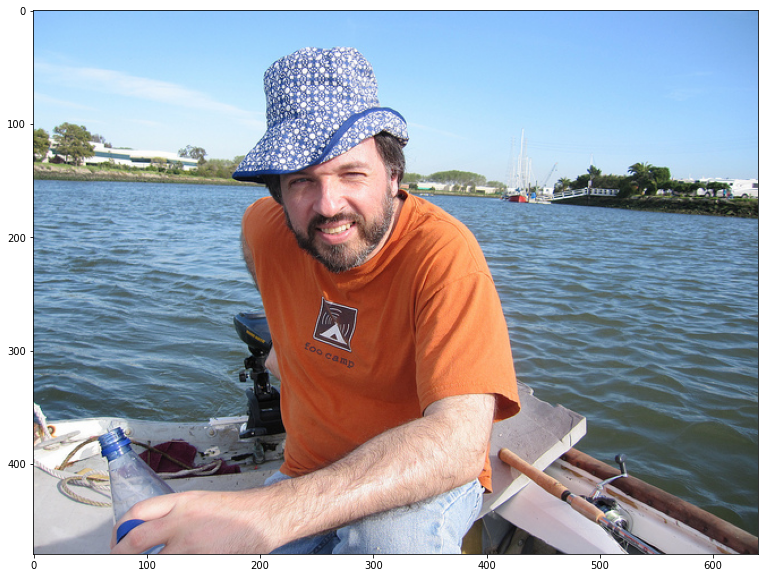

In [ ]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('train/000000001403.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
%cd ..

/content/mmdetection


In [ ]:
!mkdir data/test_2
!mkdir data/val_2

In [ ]:
!cp -a data/train/* data/test_2
!cp -a data/train/* data/val_2

In [ ]:
%cd data/test_2

/content/mmdetection/data/test_2


In [ ]:
import os

# folder path
dir_path = r'.'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)


File count: 500


In [ ]:
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

arr = os.listdir('.')
arr = sort(arr)
print(sort(arr))

trainfilelist = []
valfilelist = []
testfilelist = []
removallist = []
for i in range(len(arr)):
  if i < 2000:
    os.remove(arr[i])
    trainfilelist.append(arr[i])
  elif i >= 2000 and i < 2500:
    os.remove(arr[i])
    valfilelist.append(arr[i])
  elif i >= 2500 and i < 3000:
    testfilelist.append(arr[i])
  else:
    os.remove(arr[i])
    removallist.append(arr[i])

['000000000009.jpg', '000000000025.jpg', '000000000030.jpg', '000000000034.jpg', '000000000036.jpg', '000000000042.jpg', '000000000049.jpg', '000000000061.jpg', '000000000064.jpg', '000000000071.jpg', '000000000072.jpg', '000000000073.jpg', '000000000074.jpg', '000000000077.jpg', '000000000078.jpg', '000000000081.jpg', '000000000086.jpg', '000000000089.jpg', '000000000092.jpg', '000000000094.jpg', '000000000109.jpg', '000000000110.jpg', '000000000113.jpg', '000000000127.jpg', '000000000133.jpg', '000000000136.jpg', '000000000138.jpg', '000000000142.jpg', '000000000143.jpg', '000000000144.jpg', '000000000149.jpg', '000000000151.jpg', '000000000154.jpg', '000000000164.jpg', '000000000165.jpg', '000000000192.jpg', '000000000194.jpg', '000000000196.jpg', '000000000201.jpg', '000000000208.jpg', '000000000241.jpg', '000000000247.jpg', '000000000250.jpg', '000000000257.jpg', '000000000260.jpg', '000000000263.jpg', '000000000283.jpg', '000000000294.jpg', '000000000307.jpg', '000000000308.jpg',

In [ ]:
%cd ..
%cd val_2

/content/mmdetection/data
/content/mmdetection/data/val_2


In [ ]:
import os

# folder path
dir_path = r'.'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)


File count: 500


In [ ]:
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

arr = os.listdir('.')
arr = sort(arr)
print(sort(arr))

trainfilelist = []
valfilelist = []
testfilelist = []
removallist = []
for i in range(len(arr)):
  if i < 2000:
    os.remove(arr[i])
    trainfilelist.append(arr[i])
  elif i >= 2000 and i < 2500:
    valfilelist.append(arr[i])
  elif i >= 2500 and i < 3000:
    os.remove(arr[i])
    testfilelist.append(arr[i])
  else:
    os.remove(arr[i])
    removallist.append(arr[i])

['000000000009.jpg', '000000000025.jpg', '000000000030.jpg', '000000000034.jpg', '000000000036.jpg', '000000000042.jpg', '000000000049.jpg', '000000000061.jpg', '000000000064.jpg', '000000000071.jpg', '000000000072.jpg', '000000000073.jpg', '000000000074.jpg', '000000000077.jpg', '000000000078.jpg', '000000000081.jpg', '000000000086.jpg', '000000000089.jpg', '000000000092.jpg', '000000000094.jpg', '000000000109.jpg', '000000000110.jpg', '000000000113.jpg', '000000000127.jpg', '000000000133.jpg', '000000000136.jpg', '000000000138.jpg', '000000000142.jpg', '000000000143.jpg', '000000000144.jpg', '000000000149.jpg', '000000000151.jpg', '000000000154.jpg', '000000000164.jpg', '000000000165.jpg', '000000000192.jpg', '000000000194.jpg', '000000000196.jpg', '000000000201.jpg', '000000000208.jpg', '000000000241.jpg', '000000000247.jpg', '000000000250.jpg', '000000000257.jpg', '000000000260.jpg', '000000000263.jpg', '000000000283.jpg', '000000000294.jpg', '000000000307.jpg', '000000000308.jpg',

In [ ]:
%cd ..
%cd train

/content/mmdetection/data
/content/mmdetection/data/train


In [ ]:
import os

# folder path
dir_path = r'.'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)


File count: 2000


In [ ]:
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

arr = os.listdir('.')
arr = sort(arr)
print(sort(arr))

trainfilelist = []
valfilelist = []
testfilelist = []
removallist = []
for i in range(len(arr)):
  if i < 2000:
    trainfilelist.append(arr[i])
  elif i >= 2000 and i < 2500:
    os.remove(arr[i])
    valfilelist.append(arr[i])
  elif i >= 2500 and i < 3000:
    os.remove(arr[i])
    testfilelist.append(arr[i])
  else:
    os.remove(arr[i])
    removallist.append(arr[i])

['000000000009.jpg', '000000000025.jpg', '000000000030.jpg', '000000000034.jpg', '000000000036.jpg', '000000000042.jpg', '000000000049.jpg', '000000000061.jpg', '000000000064.jpg', '000000000071.jpg', '000000000072.jpg', '000000000073.jpg', '000000000074.jpg', '000000000077.jpg', '000000000078.jpg', '000000000081.jpg', '000000000086.jpg', '000000000089.jpg', '000000000092.jpg', '000000000094.jpg', '000000000109.jpg', '000000000110.jpg', '000000000113.jpg', '000000000127.jpg', '000000000133.jpg', '000000000136.jpg', '000000000138.jpg', '000000000142.jpg', '000000000143.jpg', '000000000144.jpg', '000000000149.jpg', '000000000151.jpg', '000000000154.jpg', '000000000164.jpg', '000000000165.jpg', '000000000192.jpg', '000000000194.jpg', '000000000196.jpg', '000000000201.jpg', '000000000208.jpg', '000000000241.jpg', '000000000247.jpg', '000000000250.jpg', '000000000257.jpg', '000000000260.jpg', '000000000263.jpg', '000000000283.jpg', '000000000294.jpg', '000000000307.jpg', '000000000308.jpg',

In [ ]:
%cd ..
%cd test_2

/content/mmdetection/data
/content/mmdetection/data/test_2


In [ ]:
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

keepList = os.listdir('.')
keepList = sort(keepList)
print(sort(keepList))

['000000012551.jpg', '000000012552.jpg', '000000012556.jpg', '000000012567.jpg', '000000012570.jpg', '000000012574.jpg', '000000012597.jpg', '000000012612.jpg', '000000012614.jpg', '000000012620.jpg', '000000012626.jpg', '000000012641.jpg', '000000012647.jpg', '000000012650.jpg', '000000012661.jpg', '000000012664.jpg', '000000012666.jpg', '000000012669.jpg', '000000012673.jpg', '000000012678.jpg', '000000012679.jpg', '000000012681.jpg', '000000012690.jpg', '000000012696.jpg', '000000012698.jpg', '000000012700.jpg', '000000012701.jpg', '000000012704.jpg', '000000012706.jpg', '000000012711.jpg', '000000012726.jpg', '000000012728.jpg', '000000012731.jpg', '000000012733.jpg', '000000012735.jpg', '000000012741.jpg', '000000012744.jpg', '000000012750.jpg', '000000012754.jpg', '000000012756.jpg', '000000012757.jpg', '000000012764.jpg', '000000012766.jpg', '000000012784.jpg', '000000012786.jpg', '000000012790.jpg', '000000012792.jpg', '000000012795.jpg', '000000012797.jpg', '000000012803.jpg',

In [ ]:
%cd ..

/content/mmdetection/data


In [ ]:
import json
from pprint import pprint

f = open('instances_train2017_trunc.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
# print(data.keys())
# print(newfilelist)
# print(removallist)
# pprint(data)
data_image = data['images']
data_image_new = []
for i in range(len(data_image)):
  # print(data_image[i]['file_name'])
  if data_image[i]['file_name'] in keepList:
    data_image_new.append(data_image[i])
print(len(data_image_new))
data['images'] = data_image_new

with open("instances_test2017_trunc.json", "w") as outfile:
  json_object = json.dumps(data, indent = 4)
  outfile.write(json_object)

500


In [ ]:
%cd val_2

/content/mmdetection/data/val_2


In [ ]:
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

keepList = os.listdir('.')
keepList = sort(keepList)
print(sort(keepList))

['000000010114.jpg', '000000010115.jpg', '000000010123.jpg', '000000010125.jpg', '000000010130.jpg', '000000010136.jpg', '000000010138.jpg', '000000010142.jpg', '000000010145.jpg', '000000010149.jpg', '000000010161.jpg', '000000010166.jpg', '000000010175.jpg', '000000010176.jpg', '000000010179.jpg', '000000010192.jpg', '000000010196.jpg', '000000010205.jpg', '000000010211.jpg', '000000010216.jpg', '000000010217.jpg', '000000010219.jpg', '000000010222.jpg', '000000010229.jpg', '000000010230.jpg', '000000010232.jpg', '000000010239.jpg', '000000010241.jpg', '000000010243.jpg', '000000010244.jpg', '000000010245.jpg', '000000010248.jpg', '000000010249.jpg', '000000010256.jpg', '000000010263.jpg', '000000010265.jpg', '000000010275.jpg', '000000010276.jpg', '000000010281.jpg', '000000010290.jpg', '000000010303.jpg', '000000010309.jpg', '000000010313.jpg', '000000010318.jpg', '000000010319.jpg', '000000010321.jpg', '000000010324.jpg', '000000010327.jpg', '000000010337.jpg', '000000010342.jpg',

In [ ]:
%cd ..

/content/mmdetection/data


In [ ]:
import json
from pprint import pprint

f = open('instances_train2017_trunc.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
# print(data.keys())
# print(newfilelist)
# print(removallist)
# pprint(data)
data_image = data['images']
data_image_new = []
for i in range(len(data_image)):
  # print(data_image[i]['file_name'])
  if data_image[i]['file_name'] in keepList:
    data_image_new.append(data_image[i])
print(len(data_image_new))
data['images'] = data_image_new

with open("instances_val2017_trunc.json", "w") as outfile:
  json_object = json.dumps(data, indent = 4)
  outfile.write(json_object)

500


In [ ]:
%cd train

/content/mmdetection/data/train


In [ ]:
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

keepList = os.listdir('.')
keepList = sort(keepList)
print(sort(keepList))

['000000000009.jpg', '000000000025.jpg', '000000000030.jpg', '000000000034.jpg', '000000000036.jpg', '000000000042.jpg', '000000000049.jpg', '000000000061.jpg', '000000000064.jpg', '000000000071.jpg', '000000000072.jpg', '000000000073.jpg', '000000000074.jpg', '000000000077.jpg', '000000000078.jpg', '000000000081.jpg', '000000000086.jpg', '000000000089.jpg', '000000000092.jpg', '000000000094.jpg', '000000000109.jpg', '000000000110.jpg', '000000000113.jpg', '000000000127.jpg', '000000000133.jpg', '000000000136.jpg', '000000000138.jpg', '000000000142.jpg', '000000000143.jpg', '000000000144.jpg', '000000000149.jpg', '000000000151.jpg', '000000000154.jpg', '000000000164.jpg', '000000000165.jpg', '000000000192.jpg', '000000000194.jpg', '000000000196.jpg', '000000000201.jpg', '000000000208.jpg', '000000000241.jpg', '000000000247.jpg', '000000000250.jpg', '000000000257.jpg', '000000000260.jpg', '000000000263.jpg', '000000000283.jpg', '000000000294.jpg', '000000000307.jpg', '000000000308.jpg',

In [ ]:
%cd ..

/content/mmdetection/data


In [ ]:
import json
from pprint import pprint

f = open('instances_train2017_trunc.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
# print(data.keys())
# print(newfilelist)
# print(removallist)
# pprint(data)
data_image = data['images']
data_image_new = []
for i in range(len(data_image)):
  # print(data_image[i]['file_name'])
  if data_image[i]['file_name'] in keepList:
    data_image_new.append(data_image[i])
print(len(data_image_new))
data['images'] = data_image_new

with open("instances_train2017_trunc2.json", "w") as outfile:
  json_object = json.dumps(data, indent = 4)
  outfile.write(json_object)

2000


In [ ]:
%cd ..

/


In [ ]:
!cp content/mmdetection/data/instances_val2017_trunc.json content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/
!cp content/mmdetection/data/instances_train2017_trunc2.json content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/
!cp content/mmdetection/data/instances_test2017_trunc.json content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/

In [ ]:
!cp -a content/mmdetection/data/train/* content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/train/
!cp -a content/mmdetection/data/test_2/* content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/test/
!cp -a content/mmdetection/data/val_2/* content/drive/MyDrive/Grad_Courses/CS7643-Deep_Learning/data/coco/val/

In [ ]:
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

arr = os.listdir('.')
arr = sort(arr)
print(sort(arr))

trainfilelist = []
valfilelist = []
testfilelist = []
removallist = []
for i in range(len(arr)):
  if i < 2000:
    trainfilelist.append(arr[i])
  elif i >= 2000 and i < 2500:
    valfilelist.append(arr[i])
  elif i >= 2500 and i < 3000:
    testfilelist.append(arr[i])
  else:
    removallist.append(arr[i])

print(len(trainfilelist))
print(len(valfilelist))
print(len(testfilelist))
print(len(removallist))
  # if i >= 3000:
  #   #os.remove(arr[i])
  #   removallist.append(arr[i])
  # else:
  #   trainfilelist.append(arr[i])


In [ ]:
import json
from pprint import pprint

f = open('instances_train2017_trunc.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
# print(data.keys())
pprint(data['categories'])

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [ ]:
import json
from pprint import pprint

f = open('instances_train2017_trunc.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
# print(data.keys())
pprint(data['images'])

Streaming output truncated to the last 5000 lines.
  'height': 428,
  'id': 12155,
  'license': 3,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/train2017/000000011802.jpg',
  'date_captured': '2013-11-16 22:59:47',
  'file_name': '000000011802.jpg',
  'flickr_url': 'http://farm7.staticflickr.com/6124/5938358490_06cfa61acd_z.jpg',
  'height': 427,
  'id': 11802,
  'license': 2,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/train2017/000000007653.jpg',
  'date_captured': '2013-11-17 03:00:03',
  'file_name': '000000007653.jpg',
  'flickr_url': 'http://farm9.staticflickr.com/8003/7304882540_595a18df44_z.jpg',
  'height': 509,
  'id': 7653,
  'license': 4,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/train2017/000000009673.jpg',
  'date_captured': '2013-11-17 07:54:46',
  'file_name': '000000009673.jpg',
  'flickr_url': 'http://farm1.staticflickr.com/52/145979565_aa2cda265e_z.jpg',
  'height': 426,
  'id': 9673,
  'license': 1,
  'width': 6

KeyboardInterrupt: ignored

In [ ]:
import json
from pprint import pprint

f = open('instances_train2017_trunc.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
# print(data.keys())
pprint(data['annotations'])

Streaming output truncated to the last 5000 lines.
                    269.36,
                    291.25,
                    265.59,
                    295.65,
                    261.81,
                    300.69,
                    253.0,
                    305.09,
                    249.22,
                    305.72,
                    244.19,
                    305.72,
                    239.78,
                    305.72,
                    236.0,
                    305.09,
                    228.45,
                    305.09,
                    224.05,
                    311.39,
                    223.42,
                    315.79,
                    226.56,
                    324.6,
                    231.6]]},
 {'area': 1497.4952500000002,
  'bbox': [234.7, 97.41, 37.7, 62.0],
  'category_id': 17,
  'id': 49100,
  'image_id': 20307,
  'iscrowd': 0,
  'segmentation': [[244.75,
                    136.79,
                    240.56,
                    127.5

KeyboardInterrupt: ignored